In [131]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Perceptron

Useful links:

* https://playground.tensorflow.org
* https://www.geogebra.org/m/jmTFk4eg


### Setup


In [132]:
# If True, test is running on Colab. Otherwise, test if assumed to be offline.
TEST_ON_COLAB = False

FOLDERNAME = "Colab Notebooks/ann/2_activation-functions" # only used if TEST_ON_COLAB is True
DATASET_OPENML_ID = "spambase" # dataset to use for testing  

assert not (FOLDERNAME is None and TEST_ON_COLAB), "FOLDERNAME has to be set if TEST_ON_COLAB is True"
assert DATASET_OPENML_ID is not None, "DATASET_OPENML_ID is not set"

Set a seed for reproducibility:

In [133]:
SEED = 42

In [134]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(SEED)

### Identity function

Perceptron computation (withou bias) is based on the following formula:

$$
\begin{aligned}
\hat{y} & = \phi(\mathbf{w} \cdot \mathbf{x})\\
        & = \mathbf{w} \cdot \mathbf{x},
\end{aligned}
$$

where $\phi$ is the identity function.


With the loss function $L = (y - \hat{y})^2$, the gradient of the loss function with respect to the weights is:

$$
\begin{aligned}
\frac{\partial L}{\partial \mathbf{w}} & = -2(y - \hat{y}) \mathbf{x}.
\end{aligned}
$$

This is useful for linear regresison and Widrow-Hoff learning rule with binary outputs.

#### Linear regression

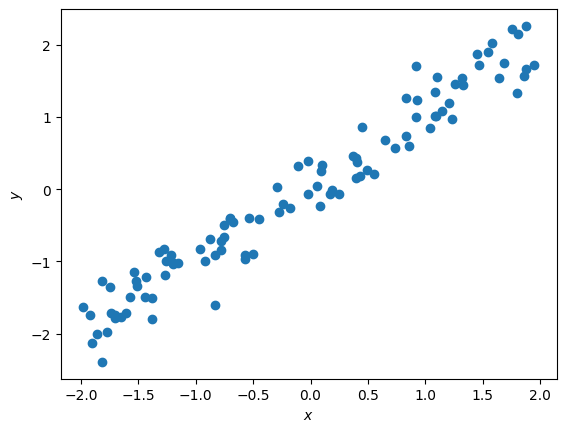

In [135]:
from utils import make_linear_regression_dataset, plot_regression_dataset_1D

x, y = make_linear_regression_dataset(n_samples=100, x_min=-2, x_max=2, w=1.0, noise=0.3)
plot_regression_dataset_1D(x, y)

In [136]:
# Add a new dimension to x
X = x[:, np.newaxis]
print(X[:5])

# Add a bias term
X_b = np.hstack([X, np.ones((X.shape[0], 1))])
print(X_b[:5])

[[-0.50183952]
 [ 1.80285723]
 [ 0.92797577]
 [ 0.39463394]
 [-1.37592544]]
[[-0.50183952  1.        ]
 [ 1.80285723  1.        ]
 [ 0.92797577  1.        ]
 [ 0.39463394  1.        ]
 [-1.37592544  1.        ]]


In [137]:
num_epochs = 100
learning_rate = 0.001

# Random weights initialization
w = np.random.normal(size=X_b.shape[1])
print(f"w.shape: {w.shape}")

iteration = 0
loss_history = []
for epoch in range(num_epochs):
    for i in range(len(X_b)):
        y_pred = np.dot(X_b[i], w)

        # Loss
        loss_value = (y[i] - y_pred) ** 2
        loss_history.append(loss_value)

        # Print loss
        print(f"Iteration {iteration}: Loss {loss_value}")

        # Update weights
        w = w + learning_rate * (y[i] - y_pred) * X_b[i]

        iteration += 1

w.shape: (2,)
Iteration 0: Loss 0.6588733950297282
Iteration 1: Loss 29.036728656992285
Iteration 2: Loss 10.624226788483584
Iteration 3: Loss 2.9967661392005893
Iteration 4: Loss 6.80385077844239
Iteration 5: Loss 8.348001321351024
Iteration 6: Loss 12.88061909600048
Iteration 7: Loss 19.859271907337973
Iteration 8: Loss 2.819992133525847
Iteration 9: Loss 6.821859187742596
Iteration 10: Loss 12.45393705794766
Iteration 11: Loss 30.43705336112381
Iteration 12: Loss 15.58958398355284
Iteration 13: Loss 3.1541987530218347
Iteration 14: Loss 3.015154162039944
Iteration 15: Loss 4.310578059396035
Iteration 16: Loss 1.2162781845510058
Iteration 17: Loss 1.4998724608210021
Iteration 18: Loss 0.008052833022615448
Iteration 19: Loss 1.536911862765328
Iteration 20: Loss 4.868613410549685
Iteration 21: Loss 6.825185038343387
Iteration 22: Loss 3.6520593640151113
Iteration 23: Loss 0.10643244403308742
Iteration 24: Loss 0.07583331619531072
Iteration 25: Loss 11.077066925084951
Iteration 26: Loss

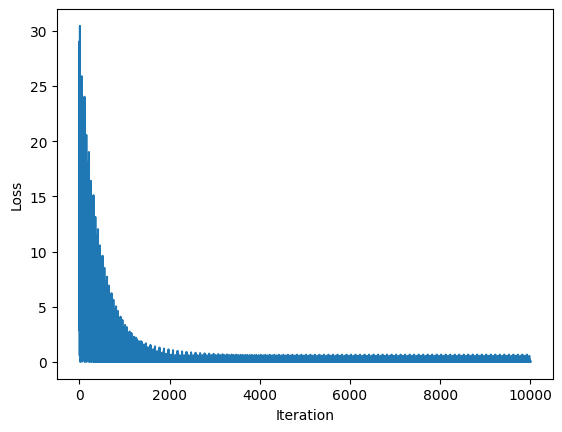

In [138]:
from utils import plot_loss_history

plot_loss_history(loss_history)
plt.show()

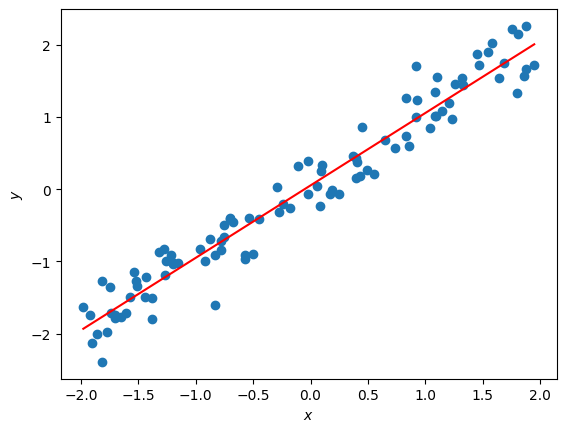

In [139]:
plot_regression_dataset_1D(x, y)

x1 = X_b[:, 0].min()
x2 = X_b[:, 0].max()
y1 = w[0] * x1 + w[1]
y2 = w[0] * x2 + w[1]
plt.plot([x1, x2], [y1, y2], color='red')
plt.show()

#### Widrow-Hoff learning rule (binary outputs)

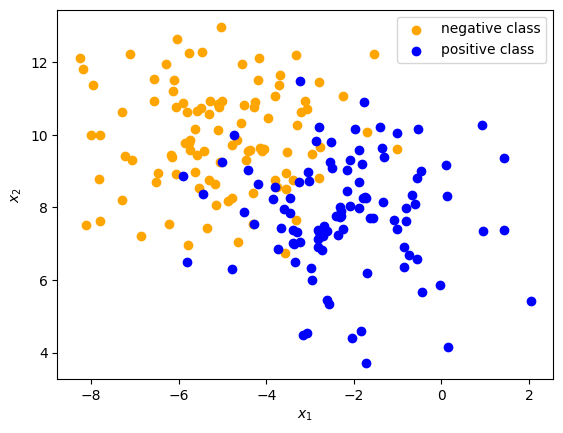

In [140]:
from utils import make_classification_dataset, plot_classification_dataset_2D

X, y = make_classification_dataset(200, 2, 2)
y[y==0] = -1
plot_classification_dataset_2D(X, y, negative_label=-1)

In [141]:
num_epochs = 100
learning_rate = 0.001

# Add a bias term
X_b = np.hstack([X, np.ones((X.shape[0], 1))])

# Random weights initialization
w = np.random.normal(size=X_b.shape[1])
print(f"w.shape: {w.shape}")

iteration = 0
loss_history = []
for epoch in range(num_epochs):
    for i in range(len(X_b)):
        y_pred = np.dot(X_b[i], w)

        # Loss
        loss_value = (y[i] - y_pred) ** 2
        loss_history.append(loss_value)

        # Print loss
        print(f"Iteration {iteration}: Loss {loss_value}")

        # Update weights
        w = w + learning_rate * (y[i] - y_pred) * X_b[i]

        iteration += 1

w.shape: (3,)
Iteration 0: Loss 3.8782548664350283
Iteration 1: Loss 3.4515538203866614
Iteration 2: Loss 2.337420663973696
Iteration 3: Loss 1.5464908250525229
Iteration 4: Loss 1.1721118503981054
Iteration 5: Loss 1.3655606897310097
Iteration 6: Loss 0.12334226521085037
Iteration 7: Loss 1.4369114472501607
Iteration 8: Loss 0.9012533223639829
Iteration 9: Loss 0.22896570602713945
Iteration 10: Loss 0.3410849221501896
Iteration 11: Loss 1.4292025597056965
Iteration 12: Loss 0.8589363505428409
Iteration 13: Loss 0.3685657420564751
Iteration 14: Loss 1.2850590219268767
Iteration 15: Loss 0.512087526758085
Iteration 16: Loss 2.031891443364179
Iteration 17: Loss 0.14403074528781887
Iteration 18: Loss 0.34118751973541916
Iteration 19: Loss 0.9958756508151881
Iteration 20: Loss 0.24893822665018622
Iteration 21: Loss 0.19313352394218739
Iteration 22: Loss 0.1460548542667816
Iteration 23: Loss 0.4644878299819911
Iteration 24: Loss 2.0303829597895877
Iteration 25: Loss 0.1459823043376938
Itera

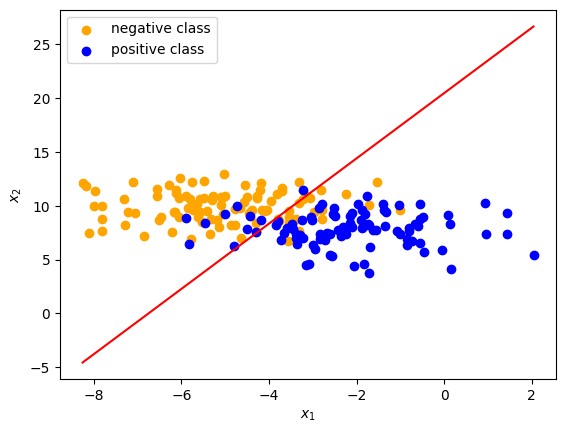

In [142]:
plot_classification_dataset_2D(X, y, negative_label=-1)

x1_min = X_b[:, 0].min()
x1_max = X_b[:, 0].max()
x2_min = (-w[2] - w[0] * x1_min) / w[1]
x2_max = (-w[2] - w[0] * x1_max) / w[1]

plt.plot([x1_min, x1_max], [x2_min, x2_max], color='red')
plt.show()

In [74]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

y_pred = [predict(x, w) for x in X]
print(f"Accuracy: {accuracy(y, y_pred)}")

Accuracy: 0.68


#### Decision boundary

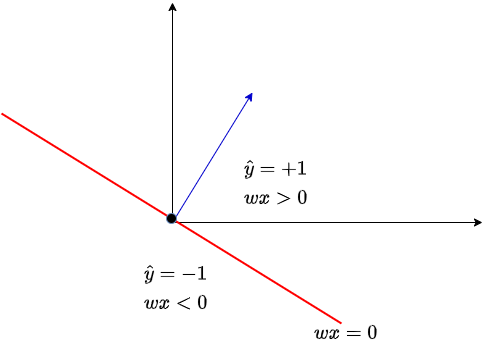

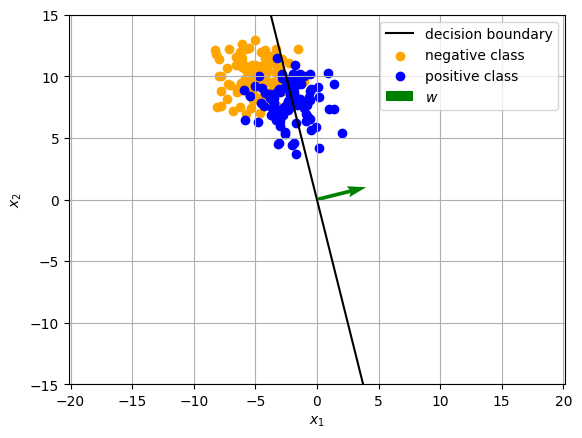

In [75]:
# plot decision boundary
x1 = np.linspace(-10, 10, 100)
x2 = -w[0] / w[1] * x1

plt.plot(x1, x2, color="black") # decision boundary
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color="orange") # negative class
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue") # positive class
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.quiver(0, 0, w[0], w[1], scale=1, scale_units="xy", angles="xy", color="green")  # weight vector
plt.legend(["decision boundary", "negative class", "positive class", "$w$"])
plt.grid(True)
plt.axis("equal")
plt.xlim(-10, 10)
plt.ylim(-15, 15)
plt.show()

### Bias neurons

Perceptron computation with bias is based on the following formula:

$$
\begin{aligned}
\hat{y} = & \text{sign}\left\{\sum_{j=1}^{m} w_j x_j + b\right\}\\
&\text{sign}\{\mathbf{w} \cdot \mathbf{x} + b\}
\end{aligned}
$$

where $\hat{y}$ is the predicted output, $\mathbf{w}$ is the weight vector, $\mathbf{x}$ is the input vector, $b$ is the bias, and $\text{sign}$ is the function that returns the sign (+ ou -) of the argument.

Example for the first row of the dataset:

In [76]:
x_0 = X[0]  # first sample
w = np.array([2, -2])  # weights
b = 3 # bias

def predict(x, w, b):
    return 1 if np.dot(x, w) + b > 0 else -1


print(f"Prediction for first sample: {predict(x_0, w, b)}")
print(f"True label for first sample: {y[0]}")

Prediction for first sample: -1
True label for first sample: 1


In [77]:
y_pred = [predict(x, w, b) for x in X]
print(f"Accuracy: {accuracy(y, y_pred)}")

Accuracy: 0.5


#### Decision boundary

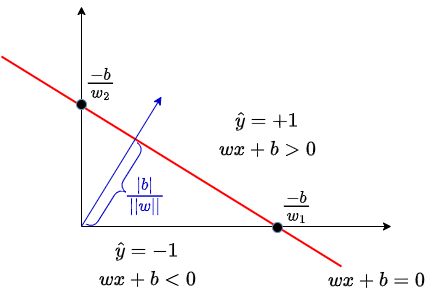

-10.0 -8.5 [ 2 -2]


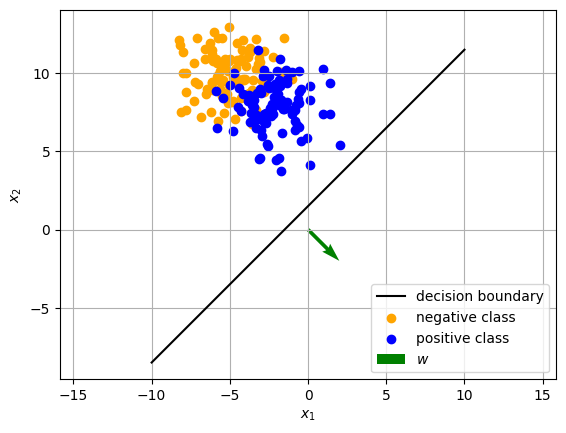

In [78]:
# plot decision boundary
x1 = np.linspace(-10, 10, 100)
x2 = (-b - w[0]*x1) / w[1]

print(x1[0], x2[0], w)

plt.plot(x1, x2, color="black")  # decision boundary
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color="orange")  # negative class
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue")  # positive class
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.quiver(0, 0, w[0], w[1], scale=1, scale_units="xy", angles="xy", color="green")  # weight vector
plt.legend(["decision boundary", "negative class", "positive class", "$w$"])
plt.axis("equal")
plt.grid(True)
plt.show()

### Training the Perceptron

Go through the input-output pairs $(\mathbf{x}_i, y_i)$ one by one and make updates, if predicted value $\hat{y}_i$ is different from observed
value $y$:

$$w \leftarrow w + \alpha \underbrace{(y_i - \hat{y}_i)}_{\text{error}}\mathbf{x}_i,$$

where:
- $\alpha$ is the learning rate (determine the speed of convergence, but any positive value will lead to convergence).
- $y_i \in \{-1, +1\}$ is the observed value (ground truth) of the $i$-th input.
- $\hat{y}_i \in \{-1, +1\}$ is the predicted value of the $i$-th input.

If $y_i \neq \hat{y}_i$ (error),

$$
\begin{aligned}
y_i &= -\hat{y}_i\\
y_i + y_i &= y_i -\hat{y}_i\\
2y_i &= y_i -\hat{y}_i.
\end{aligned}
$$

Therefore,

$$ w \leftarrow w + \underbrace{(2\alpha)}_{\alpha'}y_i \mathbf{x}_i.$$


Adding bias term to X:

In [79]:
X_b = np.hstack([X, np.ones((X.shape[0], 1))])  # add bias term
X_b[:5]

array([[-1.40597939, 10.21113225,  1.        ],
       [-2.86811725,  9.84259956,  1.        ],
       [-3.44900669,  7.83598722,  1.        ],
       [-1.5526656 ,  7.71356785,  1.        ],
       [-2.56012317,  5.34389131,  1.        ]])

In [80]:
num_epochs = 10
learning_rate = 0.001

# Random weights initialization
w = np.random.normal(size=X_b.shape[1])

iteration = 0
loss_history = []
for epoch in range(num_epochs):
    for i, x in enumerate(X_b):
        z = np.dot(x, w)
        y_pred = 1 if z > 0 else -1

        # Loss
        loss_value = max(0, -y[i] * z)
        loss_history.append(loss_value)

        # Print loss
        print(f"Iteration {iteration}: Loss {loss_value}")

        # Update weights
        w = w + learning_rate * (y[i] - y_pred) * x

        # # Alternatively, ....
        # if y[i] != y_pred:
        #     w = w + learning_rate * y[i] * x

        iteration += 1

Iteration 0: Loss 0.9693285318694361
Iteration 1: Loss 0.8545988269536527
Iteration 2: Loss 0.5137158781423407
Iteration 3: Loss 0.19802650688952983
Iteration 4: Loss 0.012859713737662815
Iteration 5: Loss 0.023090625871146297
Iteration 6: Loss 0
Iteration 7: Loss 0
Iteration 8: Loss 0
Iteration 9: Loss 0
Iteration 10: Loss 0
Iteration 11: Loss 0
Iteration 12: Loss 0.04160280685983209
Iteration 13: Loss 0
Iteration 14: Loss 0.022997224834605534
Iteration 15: Loss 0
Iteration 16: Loss 0.13529172478275464
Iteration 17: Loss 0
Iteration 18: Loss 0.0283297256496039
Iteration 19: Loss 0
Iteration 20: Loss 0
Iteration 21: Loss 0
Iteration 22: Loss 0
Iteration 23: Loss 0
Iteration 24: Loss 0.07253960505287627
Iteration 25: Loss 0
Iteration 26: Loss 0
Iteration 27: Loss 0.012563412900509663
Iteration 28: Loss 0
Iteration 29: Loss 0
Iteration 30: Loss 0.07438138763442248
Iteration 31: Loss 0
Iteration 32: Loss 0
Iteration 33: Loss 0.0439375917480459
Iteration 34: Loss 0
Iteration 35: Loss 0
Ite

Training curve:

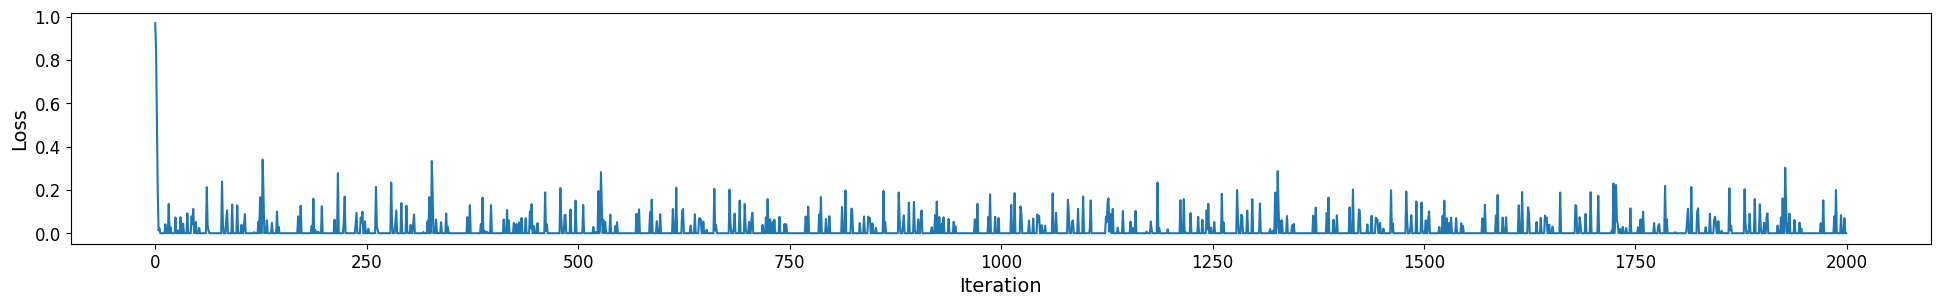

In [81]:
fig, ax = plt.subplots(figsize=(24, 3))

plt.plot(loss_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Decision boundary:

-8.255233755363747 2.037620628568785 3.624289903684095 20.54303342382


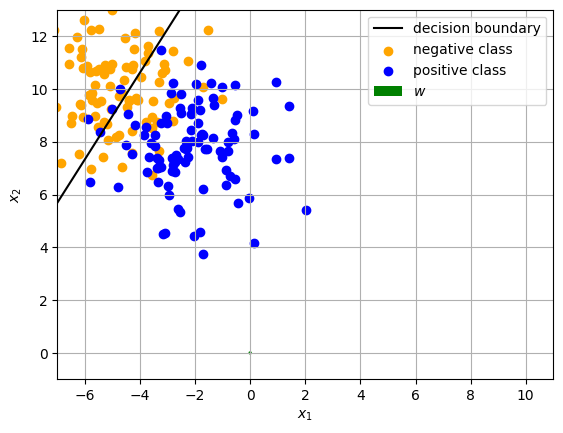

In [82]:
# plot decision boundary
x1_min = X_b[:, 0].min()
x1_max = X_b[:, 0].max()
x2_min = (-w[2] - w[0] * x1_min) / w[1]
x2_max = (-w[2] - w[0] * x1_max) / w[1]

print(x1_min, x1_max, x2_min, x2_max)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="black")  # decision boundary
plt.scatter(X_b[y == -1][:, 0], X_b[y == -1][:, 1], color="orange")  # negative class
plt.scatter(X_b[y == 1][:, 0], X_b[y == 1][:, 1], color="blue")  # positive class
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.quiver(0, 0, w[0], w[1], scale=1, scale_units="xy", angles="xy", color="green")  # weight vector
plt.legend(["decision boundary", "negative class", "positive class", "$w$"])
plt.xlim(-7, 11)
plt.ylim(-1, 13)
# plt.axis("equal")
plt.grid(True)
plt.show()

#### Perceptron vs. Linear SVMs

Perceptron criterion:

$$ L_i = \max(0, -y_i(\mathbf{w} \cdot \mathbf{x}_i))$$

Linear SVM criterion:

$$ L_i = \max(0, 1 - y_i(\mathbf{w} \cdot \mathbf{x}_i))$$


In [83]:
num_epochs = 10
learning_rate = 0.001

# Random weights initialization
w = np.random.normal(size=X_b.shape[1])

iteration = 0
loss_history = []
for epoch in range(num_epochs):
    for i, x in enumerate(X_b):
        z = np.dot(x, w)
        y_pred = 1 if z > 0 else -1

        # Loss
        loss_value = max(0, 1 - y[i] * z)
        loss_history.append(loss_value)

        # Print loss
        print(f"Iteration {iteration}: Loss {loss_value}")

        # Update weights
        if (1 - y[i] * z) > 0: # barely correct
            w = w + learning_rate * y[i] * x

        iteration += 1

Iteration 0: Loss 3.3292114579743046
Iteration 1: Loss 1.5544277995494036
Iteration 2: Loss 0.1705734797655728
Iteration 3: Loss 2.068742588363797
Iteration 4: Loss 0.18874076336300372
Iteration 5: Loss 1.8818648609525894
Iteration 6: Loss 5.357789998279781
Iteration 7: Loss 0
Iteration 8: Loss 2.8692322176411045
Iteration 9: Loss 6.2058727037856345
Iteration 10: Loss 1.8186825198398278
Iteration 11: Loss 0
Iteration 12: Loss 2.3175293768118013
Iteration 13: Loss 1.6606778991183366
Iteration 14: Loss 1.4997037501674129
Iteration 15: Loss 2.9798569923800873
Iteration 16: Loss 0
Iteration 17: Loss 5.189873986265257
Iteration 18: Loss 3.3155645937866
Iteration 19: Loss 4.029832363504025
Iteration 20: Loss 4.819149453205391
Iteration 21: Loss 2.8960594881264905
Iteration 22: Loss 6.135142747980063
Iteration 23: Loss 0.8867841587767313
Iteration 24: Loss 0.4492411089031142
Iteration 25: Loss 3.1465736822820536
Iteration 26: Loss 1.25637002227308
Iteration 27: Loss 1.9610260331482308
Iterati

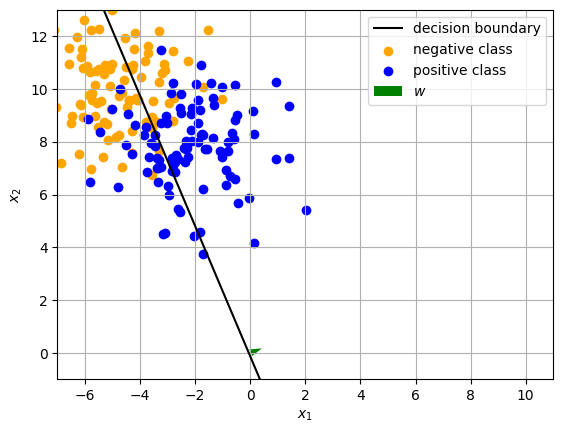

In [84]:
# plot decision boundary
x1_min = X_b[:, 0].min()
x1_max = X_b[:, 0].max()
x2_min = (-w[2] - w[0] * x1_min) / w[1]
x2_max = (-w[2] - w[0] * x1_max) / w[1]

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="black")  # decision boundary
plt.scatter(X_b[y == -1][:, 0], X_b[y == -1][:, 1], color="orange")  # negative class
plt.scatter(X_b[y == 1][:, 0], X_b[y == 1][:, 1], color="blue")  # positive class
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.quiver(0, 0, w[0], w[1], scale=1, scale_units="xy", angles="xy", color="green") # weight vector
plt.legend(["decision boundary", "negative class", "positive class", "$w$"])
plt.xlim(-7, 11)
plt.ylim(-1, 13)
# plt.axis("equal")
plt.grid(True)
plt.show()

## Case study: SPAM detection

In [85]:
# Create dataset directory

import os

if TEST_ON_COLAB:
    # This mounts your Google Drive to the Colab VM.
    from google.colab import drive

    drive.mount('/content/drive')
    cache_dir = f"/content/drive/My Drive/{FOLDERNAME}/dataset/{DATASET_OPENML_ID}"
else:
    cache_dir =  f"dataset/{DATASET_OPENML_ID}"

os.makedirs(cache_dir, exist_ok=True)

Fetching the SPAMBASE dataset.

In [86]:
from sklearn.datasets import fetch_openml
import numpy as np

X_file_path = f"{cache_dir}/X.npy"
y_file_path = f"{cache_dir}/y.npy"

# Check if the dataset files already exist
if not (os.path.exists(X_file_path) and os.path.exists(y_file_path)):
    # Download the SPAMBASE dataset
    X, y = fetch_openml(DATASET_OPENML_ID, as_frame=False, cache=True, return_X_y=True)
    
    # Save the dataset as numpy arrays
    np.save(X_file_path, X.astype(np.float32))
    np.save(y_file_path, y.astype(np.float32))
    print(f"SPAMBASE dataset downloaded and saved successfully to {cache_dir}.")
else:
    X = np.load(X_file_path, allow_pickle=True)
    y = np.load(y_file_path, allow_pickle=True)
    print(f"SPAMBASE dataset already exists in {cache_dir}. Skipping download.")

print(X.shape)
print(X.min(), X.max())

SPAMBASE dataset already exists in dataset/spambase. Skipping download.
(4601, 57)
0.0 15841.0


Splitting the dataset into training, validation and test sets.

In [87]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
np.random.seed(SEED)

# Split the data into train and test sets
y[y==0] = -1 # convert 0 labels to -1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Train set size: 3680
Test set size: 921


#### Implementation of a class Perceptron

In [88]:
class Perceptron:
    def __init__(self, num_epochs=10, learning_rate=1e-03, include_bias=True):
        """ Initialize the perceptron model.
        
        Args:
            num_epochs (int): Number of epochs to train the model.
        """
        self.num_epochs = num_epochs
        self.learning_rate = learning_rate
        self.w = None
        self.include_bias = include_bias

    def fit(self, X, y):
        """ Fit the perceptron model.
        
        Args:
            X (ndarray): Input data of shape (num_samples, num_features).
            y (ndarray): Target labels of shape (num_samples,).
        """
        
        # Add bias term
        if self.include_bias:
            X = np.hstack([X, np.ones((X.shape[0], 1))])
        
        # Random weights initialization
        self.w = np.random.normal(size=X.shape[1])

        for epoch in range(self.num_epochs):
            for i, x in enumerate(X):
                z = np.dot(x, self.w)
                y_pred = 1 if z > 0 else -1
                self.w = self.w + self.learning_rate * (y[i] - y_pred) * x
        
        return self
    
    def predict(self, X):
        """ Predict the target labels.
        
        Args:
            X (ndarray): Input data of shape (num_samples, num_features).
        
        Returns:
            ndarray: Predicted target labels of shape (num_samples,).
        """
        
        if self.include_bias:
            X = np.hstack([X, np.ones((X.shape[0], 1))])
        
        return np.array([1 if np.dot(x, self.w) > 0 else -1 for x in X])

#### Training the Perceptron

In [89]:
model = Perceptron(num_epochs=50, learning_rate=1e-02)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Classification report

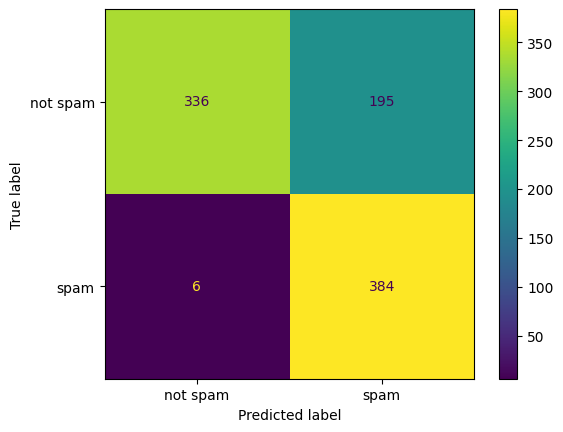


Classification Report:
              precision    recall  f1-score   support

    not spam       0.98      0.63      0.77       531
        spam       0.66      0.98      0.79       390

    accuracy                           0.78       921
   macro avg       0.82      0.81      0.78       921
weighted avg       0.85      0.78      0.78       921



In [90]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=[-1, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["not spam", "spam"])
disp.plot()
plt.show()

# Compute classification report
class_report = classification_report(y_test, y_pred, target_names=["not spam", "spam"])

print("\nClassification Report:")
print(class_report)